In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:

# === 1. Завантаження та обробка даних ===
input_file = 'income_data.txt'



In [3]:
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [4]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line.strip().split(',')

        if data[-1] == ' <=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        elif data[-1] == ' >50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [5]:
X = np.array(X)

In [6]:
# === 2. Кодування категоріальних змінних ===
label_encoder = []
X_encoded = np.empty(X.shape)

for i in range(X.shape[1]):
    if X[0, i].isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        le = preprocessing.LabelEncoder()
        X_encoded[:, i] = le.fit_transform(X[:, i])
        label_encoder.append(le)

# === 3. Формування X та y ===
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [7]:
# === 4. Розділення на тренувальну і тестову вибірки ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:


models = {
    'Logistic Regression (LR)': LogisticRegression(solver='liblinear'),
    'Linear Discriminant Analysis (LDA)': LinearDiscriminantAnalysis(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Decision Tree (CART)': DecisionTreeClassifier(random_state=0),
    'Gaussian Naive Bayes (NB)': GaussianNB(),
       # 'Support Vector Machine (SVM)': make_pipeline(StandardScaler(), SVC(gamma='auto')), дуже повільно
    'Linear Support Vector (LinearSVC)': make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, dual='auto'))  #(SVM) аналог
}

# === 6. Крос-валідація ===
results = []
names = []

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")


Logistic Regression (LR): 0.7791 (0.0053)
Linear Discriminant Analysis (LDA): 0.7829 (0.0051)
K-Nearest Neighbors (KNN): 0.7462 (0.0029)
Decision Tree (CART): 0.8028 (0.0086)
Gaussian Naive Bayes (NB): 0.7974 (0.0061)
Linear Support Vector (LinearSVC): 0.7831 (0.0041)


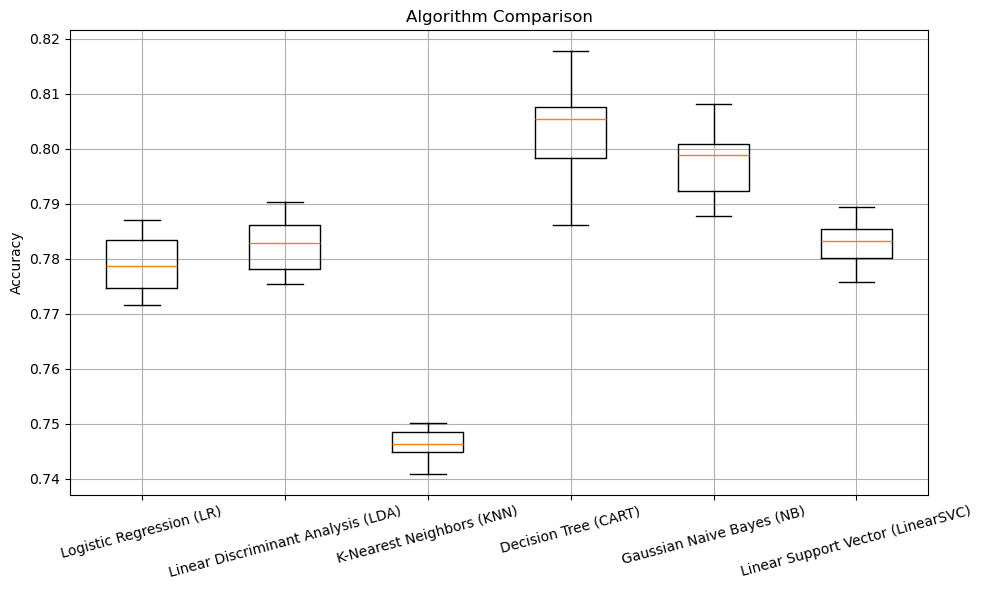

In [9]:
# === 7. Візуалізація ===
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()